<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##

#Analizando causalidad utilizando información mutua

##Importando librerías

In [21]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

  FORMAT OF THE SUBSETTED FILE
    
    ITEMS                      FORMAT   
     
 1 Year                          I4        
 2 Day                           I4        
 3 Hour                          I3        
 4 Minute                        I3        
 5 Field magnitude average, nT   F8.2      
 6 BX, nT (GSE, GSM)             F8.2      
 7 BY, nT (GSE)                  F8.2      
 8 BZ, nT (GSE)                  F8.2      
 9 Speed, km/s                   F8.1      
10 Vx Velocity,km/s              F8.1      
11 Vy Velocity, km/s             F8.1      
12 Vz Velocity, km/s             F8.1      
13 AE-index, nT                  I6        

In [17]:
import pandas as pd

url="https://omniweb.gsfc.nasa.gov/staging/omni_min_2Xdv0flgmn.lst"
df=pd.read_csv(url,delim_whitespace=True,header=None)

In [84]:
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/gfajardo_uNz2xU-2020-2.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [87]:
#print(df)

s4=s4[s4['Elv']>25]
s4.describe()

,Año,Day,Tiempo,PRN,S4,Az,Elv
count,314079.0,314079.00000,314079.000000,314079.000000,314079.000000,314079.000000,314079.000000
mean,20.0,321.35792,41964.912477,33.933106,0.062762,195.699006,45.857488
std,0.0,9.24761,25489.011150,43.653003,0.029140,97.079066,13.510426
min,20.0,306.00000,22.000000,1.000000,0.020000,0.000000,25.100000
25%,20.0,313.00000,18142.000000,9.000000,0.040000,124.400000,34.900000
50%,20.0,321.00000,42442.000000,20.000000,0.060000,200.100000,45.600000
75%,20.0,329.00000,64762.000000,28.000000,0.080000,288.400000,52.200000
max,20.0,337.00000,85540.000000,138.000000,0.830000,360.000000,89.000000


In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2020,306,0,0,4.24,-3.25,1.95,1.89,372.6,-372.4,-9.1,-5.0,99999
1,2020,306,0,1,4.34,-3.32,2.29,1.60,99999.9,99999.9,99999.9,99999.9,99999
2,2020,306,0,2,4.17,-3.06,2.73,0.72,376.9,-376.1,-21.1,13.5,99999
3,2020,306,0,3,4.22,-3.12,2.71,0.79,376.9,-376.1,-21.1,13.5,99999
4,2020,306,0,4,4.28,-2.95,2.55,1.55,372.6,-372.1,-16.7,9.3,99999


In [19]:
df.describe

<bound method NDFrame.describe of          0    1   2   3     4   ...       8        9        10       11     12
0      2020  306   0   0  4.24  ...    372.6   -372.4     -9.1     -5.0  99999
1      2020  306   0   1  4.34  ...  99999.9  99999.9  99999.9  99999.9  99999
2      2020  306   0   2  4.17  ...    376.9   -376.1    -21.1     13.5  99999
3      2020  306   0   3  4.22  ...    376.9   -376.1    -21.1     13.5  99999
4      2020  306   0   4  4.28  ...    372.6   -372.1    -16.7      9.3  99999
...     ...  ...  ..  ..   ...  ...      ...      ...      ...      ...    ...
43195  2020  335  23  55  4.26  ...    436.3   -434.4    -36.4    -18.2  99999
43196  2020  335  23  56  4.27  ...    443.7   -442.8    -28.3     -5.8  99999
43197  2020  335  23  57  4.27  ...    440.3   -438.6    -37.1    -14.2  99999
43198  2020  335  23  58  4.29  ...    439.9   -438.0    -38.3    -15.3  99999
43199  2020  335  23  59  4.30  ...    447.2   -445.6    -35.4    -14.7  99999

[43200 rows x 13 

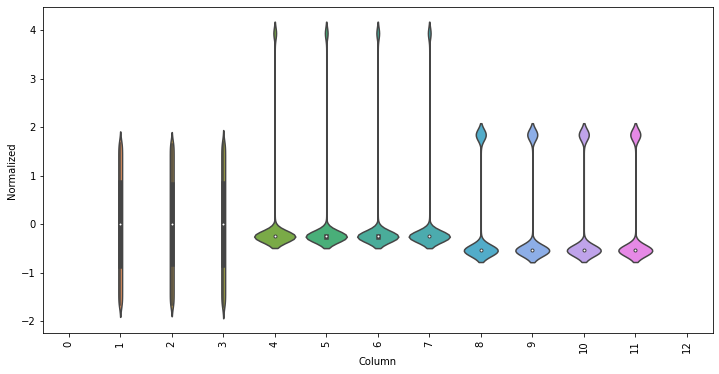

In [22]:
df_std = (df - df.mean()) / df.std()
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

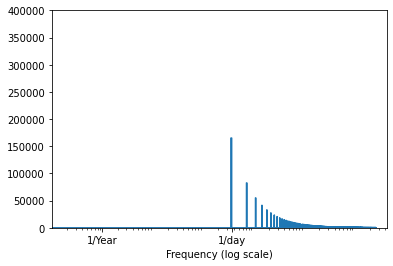

In [35]:
#Este cpodigo aún debe ser adaptdo, en este punto existen "n" muestras para cada observación, además "n" es variable
fft = tf.signal.rfft(df[2])
f_per_dataset = np.arange(0, len(fft))

n_samples_5min = len(df[2])
hours_per_year = 24*365.2524*60
years_per_dataset = n_samples_h/(hours_per_year)


f_per_year = f_per_dataset/years_per_dataset



plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Crearemos una función para evaluar causalidad, usando Informaci{on mutua retrasada, para ello, la función nos devuelve el dataframe original recortado y el dataframe nuevo.

In [44]:
def recorte(df,time_delay):
  #time_delay. Es el retraso en pasos (términos de la frecuencia de muestreo), en tiempo real sería= time_delay*frecuencia de muestreo
  #df es el dataset orginal
  return df[:len(df)-time_delay],df[time_delay:]

In [109]:
a=recorte(df,15)

x=a[0][a[0].columns[4:10]]
y1=a[1][11]

#print(a[0][a[0].columns[4:10]])
print(a[0])
print(a[1])

         0    1   2   3     4   ...       8        9        10       11     12
0      2020  306   0   0  4.24  ...    372.6   -372.4     -9.1     -5.0  99999
1      2020  306   0   1  4.34  ...  99999.9  99999.9  99999.9  99999.9  99999
2      2020  306   0   2  4.17  ...    376.9   -376.1    -21.1     13.5  99999
3      2020  306   0   3  4.22  ...    376.9   -376.1    -21.1     13.5  99999
4      2020  306   0   4  4.28  ...    372.6   -372.1    -16.7      9.3  99999
...     ...  ...  ..  ..   ...  ...      ...      ...      ...      ...    ...
43180  2020  335  23  40  4.26  ...    414.7   -411.8    -26.7    -41.5  99999
43181  2020  335  23  41  4.29  ...    414.7   -411.8    -26.7    -41.5  99999
43182  2020  335  23  42  4.25  ...  99999.9  99999.9  99999.9  99999.9  99999
43183  2020  335  23  43  4.25  ...    411.4   -409.7    -27.1    -25.6  99999
43184  2020  335  23  44  4.21  ...    414.7   -412.9    -28.9    -25.4  99999

[43185 rows x 13 columns]
         0    1   2   3  

In [106]:
import sklearn
from sklearn import metrics
import numpy as np

vector=np.arange(0, 300, 5)
print(vector)
vector_mi=[]
vector_co=[]
indice_entrada=4
indice_salida=7
def mutual_information_along_vector(df,vector,indice_entrada,indice_salida):
  for i in vector:
    a=recorte(df,i)
    x=a[0][indice_entrada]
    y1=a[1][indice_salida]
    mi=sklearn.metrics.mutual_info_score(y1,x)
    r = np.corrcoef(x, y1)
    vector_mi.append(mi)
    vector_co.append(r[1,0])
  return np.transpose(vector_mi),np.transpose(vector_co) 
vector_mi=mutual_information_along_vector(df,vector,indice_entrada,indice_salida)
print(mi)
#print(r)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295]
2.367235729089864


In [107]:
print(r[1,0])

0.2876529839642533


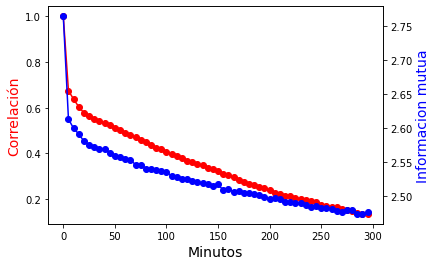

In [108]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(vector,vector_mi[1], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Minutos",fontsize=14)
# set y-axis label
ax.set_ylabel("Correlación",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(vector,vector_mi[0],color="blue",marker="o")
ax2.set_ylabel("Información mutua",color="blue",fontsize=14)
plt.show()


In [102]:
df[1]

0        306
1        306
2        306
3        306
4        306
        ... 
43195    335
43196    335
43197    335
43198    335
43199    335
Name: 1, Length: 43200, dtype: int64